<a href="https://colab.research.google.com/github/MJVNOR/WorkStatistic/blob/master/ModeloClasificacionDeVinos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
os.kill(os.getpid(), 9)

In [2]:
import pandas as pd
import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

wine_data = load_wine()

train_data = np.array(wine_data.data)
train_labels = np.array(wine_data.target)

num_features = wine_data.data.shape[1]
unique_labels = np.unique(train_labels)
num_classes = len(unique_labels)


print("The wine dataset has " + str(num_features) + " features")
print(wine_data.feature_names)
print("The wine dataset has " + str(num_classes) + " categoryes")
print(wine_data.target_names)


# Put everything into a Pandas DataFrame
data = pd.DataFrame(data=np.c_[train_data, train_labels], columns=wine_data.feature_names + ['category'])
print(tabulate(data, headers='keys', tablefmt='psql'))

The wine dataset has 13 features
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
The wine dataset has 3 categoryes
['class_0' 'class_1' 'class_2']
+-----+-----------+--------------+-------+---------------------+-------------+-----------------+--------------+------------------------+-------------------+-------------------+-------+--------------------------------+-----------+------------+
|     |   alcohol |   malic_acid |   ash |   alcalinity_of_ash |   magnesium |   total_phenols |   flavanoids |   nonflavanoid_phenols |   proanthocyanins |   color_intensity |   hue |   od280/od315_of_diluted_wines |   proline |   category |
|-----+-----------+--------------+-------+---------------------+-------------+-----------------+--------------+------------------------+-------------------+-------------------+-------+---------------------

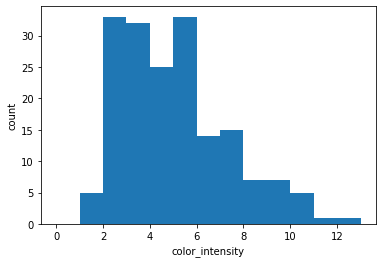

In [3]:
# Create histogram
hist_feature_name='color_intensity'
bin_edges = np.arange(0, data[hist_feature_name].max() + 1, 1)
fig = plt.hist(data[hist_feature_name], bins=bin_edges)

plt.ylabel('count')
plt.xlabel(hist_feature_name)
plt.show()

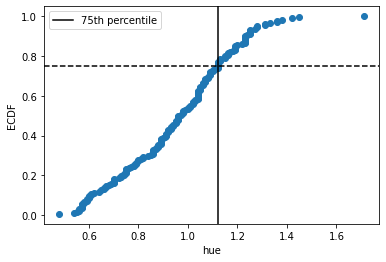

In [4]:
x = np.sort(data['hue'])
y = np.arange(1, x.shape[0] + 1, dtype='float32') / x.shape[0]

plt.plot(x, y, marker='o', linestyle='')

plt.ylabel('ECDF')
plt.xlabel('hue')

eightieth_percentile = x[y <= 0.75].max()

plt.axhline(0.75, color='black', linestyle='--')
plt.axvline(eightieth_percentile, color='black', label='75th percentile')
plt.legend()
plt.show()

In [5]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [6]:
import tensorflow
#importamos nuestros datos de vino
wine_data = load_wine()
#Queremos determinar que clase o grado de vino tenemos 
#de acuerdo a 13 características que tenemos en nuestro dataset

print(wine_data["DESCR"])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [0]:
#Aqui son las 13 características 
caractercaracteristicas = wine_data["data"]
#Aqui tenemos las clases de vino de acuerdo a nuestras características 
objetivo = wine_data ["target"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(caractercaracteristicas, objetivo, test_size=0.3)

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
normalizador = MinMaxScaler()

In [0]:
X_train_normalizado = normalizador.fit_transform(X_train)
X_test_normalizado = normalizador.fit_transform(X_test)

In [0]:
from tensorflow.contrib.keras import models, layers, losses, optimizers, metrics, activations

In [0]:
#creando mi modelo
modelo = models.Sequential()

In [14]:
#creando capa de entrada tipo dense
modelo.add(layers.Dense(units=13, input_dim = 13, activation="relu"))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
#añadimos dos entradas intermedias
modelo.add(layers.Dense(units=13, activation="relu"))
modelo.add(layers.Dense(units=13, activation="relu"))

In [0]:
#creando capa de salida
modelo.add(layers.Dense(units=3, activation="softmax"))

In [0]:
#compilar el modelo
modelo.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [18]:
#Entrenamiento del modelo.
modelo.fit(X_train_normalizado, y_train, epochs=60)

Train on 124 samples
Epoch 1/60
124/124 [==============================] - 0s 692us/sample - loss: 1.0400 - acc: 0.4435
Epoch 2/60
124/124 [==============================] - 0s 83us/sample - loss: 1.0267 - acc: 0.4435
Epoch 3/60
124/124 [==============================] - 0s 109us/sample - loss: 1.0145 - acc: 0.4597
Epoch 4/60
124/124 [==============================] - 0s 74us/sample - loss: 1.0023 - acc: 0.4597
Epoch 5/60
124/124 [==============================] - 0s 72us/sample - loss: 0.9890 - acc: 0.4677
Epoch 6/60
124/124 [==============================] - 0s 78us/sample - loss: 0.9763 - acc: 0.4677
Epoch 7/60
124/124 [==============================] - 0s 65us/sample - loss: 0.9622 - acc: 0.4758
Epoch 8/60
124/124 [==============================] - 0s 72us/sample - loss: 0.9470 - acc: 0.4919
Epoch 9/60
124/124 [==============================] - 0s 75us/sample - loss: 0.9322 - acc: 0.5161
Epoch 10/60
124/124 [==============================] - 0s 74us/sample - loss: 0.9173 - acc: 0.5

In [0]:
#realizando predicciones para estimar
predicciones = modelo.predict_classes(X_test_normalizado)

In [20]:
from sklearn.metrics import  classification_report
#aqui comparamos compartamos los valores reales con las predicciones de mi modelo
print(classification_report(y_test,predicciones))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.96      1.00      0.98        25
           2       1.00      0.94      0.97        16

    accuracy                           0.98        54
   macro avg       0.99      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



In [0]:
#En el resultado de nuestro modelo podemos observar que el modelo cuando
#quiere deternar los tipos de clases a los que pertenece cada vino nos da que
#en la clasificación de vinos de clase 0 y 2 siempre nos da un resultado correcto
#mientras que para determinar la clase 1 de vino nos daria un 96% de exactitud.